In [ ]:
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
import pandas as pd
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
%%capture
!wget https://www.dropbox.com/s/0un1sdvifenp2ir/nyc-rolling-sales.csv

In [ ]:
df = pd.read_csv('nyc-rolling-sales.csv', encoding='iso-8859-1')

In [ ]:
df.sample(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
8209,8213,1,MIDTOWN EAST,10 COOPS - ELEVATOR APARTMENTS,2,1371,38,,D4,"25 SUTTON PLACE SOUTH, 14A",...,0,0,0,-,-,1959,2,D4,800000,2017-02-27 00:00:00
55109,5711,4,ELMHURST,10 COOPS - ELEVATOR APARTMENTS,2,1527,1,,D4,"81-11 45TH AVENUE, 8V",...,0,0,0,-,-,1961,2,D4,145000,2017-01-31 00:00:00
73111,23713,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1,11823,29,,A5,149-15 122ND STREET,...,1,0,1,2025,1320,1945,1,A5,475000,2017-07-28 00:00:00
8607,8611,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1362,1137,,R4,400 EAST 51ST STREET,...,1,0,1,-,-,2002,2,R4,2360000,2016-12-13 00:00:00
80158,4024,5,NEW BRIGHTON,02 TWO FAMILY DWELLINGS,1,18,134,,B2,48 MONROE AVENUE,...,2,0,2,2700,2462,1925,1,B2,-,2016-11-14 00:00:00
11978,11982,1,UPPER EAST SIDE (59-79),10 COOPS - ELEVATOR APARTMENTS,2,1392,1,,D4,"3 EAST 77TH ST, 11B",...,0,0,0,-,-,1927,2,D4,4400000,2016-12-14 00:00:00
72363,22965,4,SOUTH JAMAICA,01 ONE FAMILY DWELLINGS,1,10194,68,,A1,166-17 111TH AVENUE,...,1,0,1,1900,1200,1920,1,A1,450000,2017-04-13 00:00:00
13728,13732,1,UPPER EAST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1505,40,,D4,"1192 PARK AVENUE, 14B",...,0,0,0,-,-,1926,2,D4,4870000,2016-10-03 00:00:00
45812,20461,3,SEAGATE,04 TAX CLASS 1 CONDOS,1A,6972,1002,,R3,4212 HIGHLAND AVENUE,...,1,0,1,0,0,2007,1,R3,0,2017-01-17 00:00:00
84122,7988,5,WESTERLEIGH,02 TWO FAMILY DWELLINGS,1,1478,251,,B3,27 VEDDER AVENUE,...,2,0,2,8575,2880,1975,1,B3,800000,2017-07-07 00:00:00


In [ ]:
df.isnull().any()

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

In [ ]:
df['NEIGHBORHOOD'].value_counts()

NEIGHBORHOOD
FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
BRONX PARK                     1
PELHAM BAY                     1
EAST RIVER                     1
CITY ISLAND-PELHAM STRIP       1
Name: count, Length: 254, dtype: int64

In [ ]:
df = df.drop(df[pd.isnull(df['NEIGHBORHOOD'])].index)
df = df.drop(df[pd.isnull(df['BUILDING CLASS CATEGORY'])].index)
df = df.drop(df[pd.isnull(df['TAX CLASS AT PRESENT'])].index)
df = df.drop(df[pd.isnull(df['EASE-MENT'])].index)

In [ ]:
df = df.drop(df[pd.isnull(df['BUILDING CLASS AT PRESENT'])].index)
df = df.drop(df[pd.isnull(df['ADDRESS'])].index)
df = df.drop(df[pd.isnull(df['APARTMENT NUMBER'])].index)
df = df.drop(df[pd.isnull(df['LAND SQUARE FEET'])].index)
df = df.drop(df[pd.isnull(df['GROSS SQUARE FEET'])].index)
df = df.drop(df[pd.isnull(df['BUILDING CLASS AT TIME OF SALE'])].index)
df = df.drop(df[pd.isnull(df['SALE PRICE'])].index)
df = df.drop(df[pd.isnull(df['SALE DATE'])].index)

In [ ]:
df['SALE PRICE'].unique()

array(['6625000', ' -  ', '3936272', ..., '408092', '11693337', '69300'],
      dtype=object)

In [ ]:
df = df.drop(df[(df['SALE PRICE'] == '0') | (df['SALE PRICE'] == ' -  ')].index)

In [ ]:
df['SALE PRICE'].value_counts()

SALE PRICE
10         766
450000     427
550000     416
650000     414
600000     409
          ... 
191100       1
811000       1
782990       1
2784765      1
69300        1
Name: count, Length: 10006, dtype: int64

In [ ]:
import numpy as np

df['SALE PRICE'] = df['SALE PRICE'].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59759 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         59759 non-null  int64 
 1   NEIGHBORHOOD                    59759 non-null  object
 2   BUILDING CLASS CATEGORY         59759 non-null  object
 3   TAX CLASS AT PRESENT            59759 non-null  object
 4   BLOCK                           59759 non-null  int64 
 5   LOT                             59759 non-null  int64 
 6   EASE-MENT                       59759 non-null  object
 7   BUILDING CLASS AT PRESENT       59759 non-null  object
 8   ADDRESS                         59759 non-null  object
 9   APARTMENT NUMBER                59759 non-null  object
 10  ZIP CODE                        59759 non-null  int64 
 11  RESIDENTIAL UNITS               59759 non-null  int64 
 12  COMMERCIAL UNITS                59759 non-null  int

In [ ]:
names = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE']
for name in names:
    df[name] = pd.factorize(df[name])[0]
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,0,0,0,392,6,0,0,0,0,...,5,0,5,0,0,1900,2,0,6625000,0
3,1,0,0,1,402,21,0,1,1,0,...,10,0,10,1,1,1913,2,1,3936272,1
4,1,0,0,0,404,55,0,0,2,0,...,6,0,6,2,2,1900,2,0,8000000,2
6,1,0,0,1,406,32,0,1,3,0,...,8,0,8,3,3,1920,2,1,3192840,1
9,1,0,1,2,387,153,0,2,4,0,...,24,0,24,4,4,1920,2,2,16232000,3


In [ ]:
df_wo_na = df.dropna()
df_wo_na.reset_index(inplace=True)
del df_wo_na['index']

In [ ]:
df_wo_na.sample(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
34764,3,135,25,5,2334,1051,0,46,26911,146,...,0,0,1,617,827,2008,4,45,56000,220
16013,2,57,1,2,3239,77,0,3,11180,0,...,37,0,37,1211,1533,1927,2,3,5500000,3
28663,3,107,3,2,7776,26,0,6,22008,0,...,0,0,0,617,827,1966,2,6,215000,240
30459,3,117,3,2,8821,1,0,6,23491,0,...,0,0,0,617,827,1951,2,6,153000,138
13764,1,35,25,5,1226,1101,0,46,9010,1301,...,0,0,1,6,6,1971,4,45,13000000,73
40917,4,157,6,2,4978,1417,0,10,32418,34,...,1,0,1,6,6,2014,2,9,1115898,72
25641,3,97,14,6,4107,9,0,70,19575,0,...,2,0,2,25,960,1925,1,69,3750,142
38514,4,151,2,2,8305,10,0,4,30180,0,...,0,0,0,6,6,1953,2,4,305000,84
32716,3,127,5,2,1171,1319,0,9,25551,2478,...,1,0,1,617,827,0,2,8,940000,83
1336,1,4,6,2,1061,1249,0,10,755,500,...,1,0,1,6,6,1940,2,9,1997000,64


In [ ]:
df_wo_na['SALE PRICE'].value_counts()

SALE PRICE
10         766
450000     427
550000     416
650000     414
600000     409
          ... 
191100       1
811000       1
782990       1
2784765      1
69300        1
Name: count, Length: 10006, dtype: int64

In [ ]:
Y = df_wo_na['SALE PRICE']
X = df_wo_na.drop(['SALE PRICE'], axis = 1)
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)
print(mean_absolute_error(test_values, rf_predict))

875516.9626064572


In [ ]:
nn_model = Sequential()
nn_model.add(Dense(9, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 1000,
 validation_data = (test_points, test_values)
)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1448545.8750 - val_loss: 1483587.8750
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1568624.7500 - val_loss: 1447042.3750
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1490660.6250 - val_loss: 1324377.2500
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1262622.3750 - val_loss: 1247055.7500
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1354343.6250 - val_loss: 1233106.1250
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1175714.6250 - val_loss: 1215569.2500
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1231377.3750 - val_loss: 1192745.1250
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1161954.8750 - val_loss: 1164025.0000
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1131759.7500 - val_loss: 1134130.5000
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1124645.2500 - val_loss: 1113309.3750


In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(train_points, train_values)

xgb_predict = xg_reg.predict(test_points)

print(mean_absolute_error(test_values, xgb_predict))

949555.7359116744


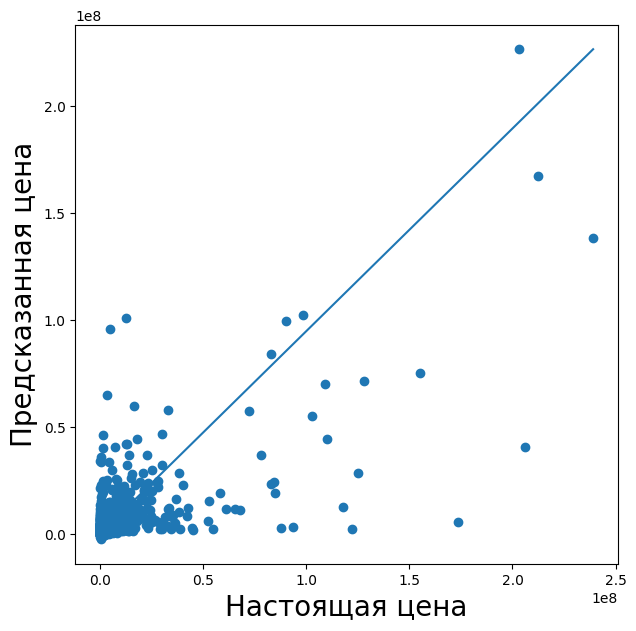

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, xgb_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(xgb_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [ ]:
df_wo_na = df_wo_na[(df_wo_na['SALE PRICE'] > 10)]
df_wo_na.reset_index(inplace=True)
del df_wo_na['index']

In [ ]:
Y = df_wo_na['SALE PRICE']
X = df_wo_na.drop(['SALE PRICE'], axis = 1)
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)

print(mean_absolute_error(test_values, xgb_predict))

1094987.152491539


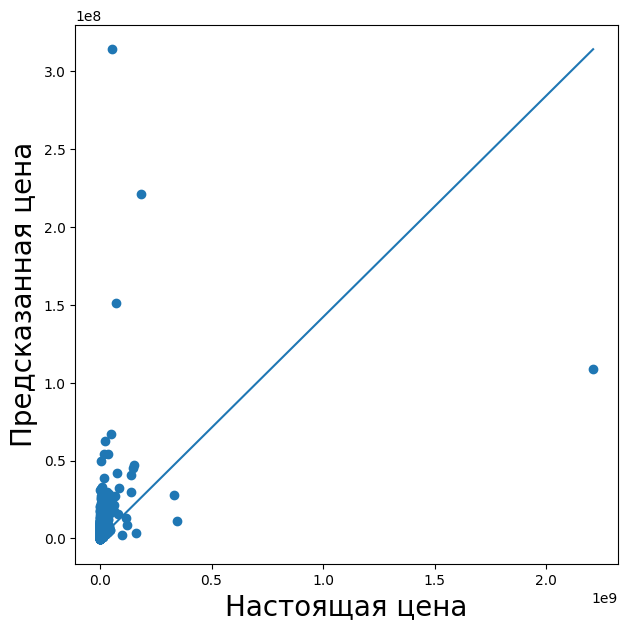

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, xgb_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(xgb_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)
print(mean_absolute_error(test_values, rf_predict))

964994.1837606175


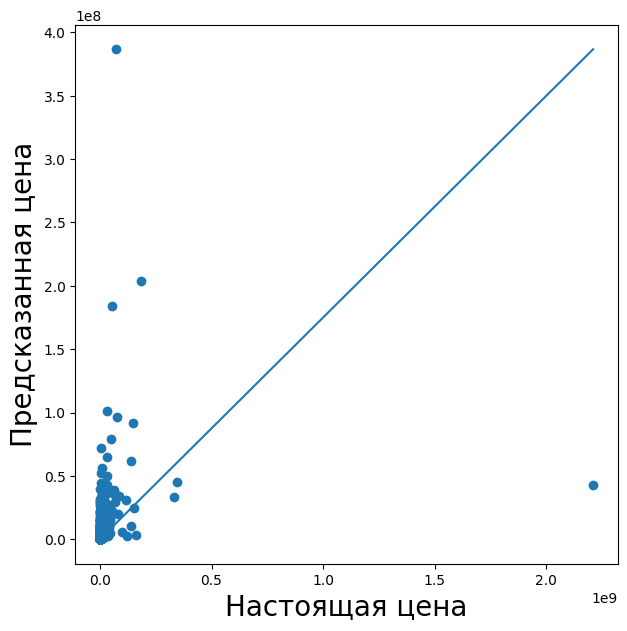

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, rf_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(rf_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

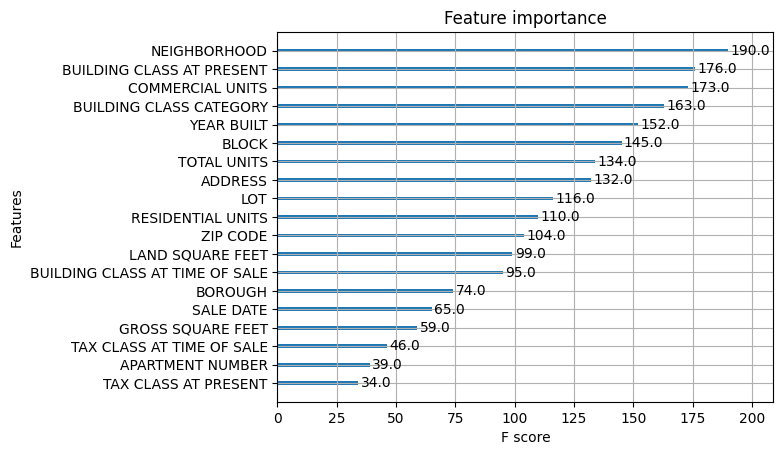

In [ ]:
xgb.plot_importance(xg_reg)
plt.show()

In [ ]:
del df_wo_na['APARTMENT NUMBER']
del df_wo_na['TAX CLASS AT TIME OF SALE']
del df_wo_na['TAX CLASS AT PRESENT']

In [ ]:
Y = df_wo_na['SALE PRICE']
X = df_wo_na.drop(['SALE PRICE'], axis = 1)

train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(7, activation='relu'))
nn_model.add(Dense(25, activation='relu'))
nn_model.add(Dense(25, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 100,
 validation_data = (test_points, test_values)
)

nn_predict = nn_model.predict(test_points)
print(mean_absolute_error(test_values, nn_predict))

Epoch 1/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1420517.0000 - val_loss: 993249.0000
Epoch 2/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1308322.5000 - val_loss: 946695.4375
Epoch 3/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1055704.2500 - val_loss: 937171.1250
Epoch 4/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1137588.5000 - val_loss: 933112.8750
Epoch 5/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1119463.8750 - val_loss: 930296.0625
Epoch 6/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1055989.0000 - val_loss: 928509.1875
Epoch 7/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1106160.1250 - val_loss: 926553.8125
Epoch 8/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1090306.3750 - val_loss: 925526.3750
Epoch 9/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1092616.8750 - val_loss: 924291.5000
Epoch 10/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1120289.8750 - val_loss: 924189.5625
368/368 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)
print(mean_absolute_error(test_values, rf_predict))

734870.5196314196


In [ ]:
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)
print(mean_absolute_error(test_values, xgb_predict))

898444.3819435826


In [ ]:
nn_model = Sequential()
nn_model.add(Dense(7, activation='relu'))
nn_model.add(Dense(25, activation='relu'))
nn_model.add(Dense(25, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 100,
 validation_data = (test_points, test_values)
)

nn_predict = nn_model.predict(test_points)
print(mean_absolute_error(test_values, nn_predict))

Epoch 1/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1396990.0000 - val_loss: 1011262.2500
Epoch 2/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1141098.5000 - val_loss: 947365.6250
Epoch 3/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1081042.3750 - val_loss: 939996.0625
Epoch 4/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1084096.8750 - val_loss: 935191.6250
Epoch 5/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1047593.1875 - val_loss: 931735.0000
Epoch 6/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1249964.6250 - val_loss: 929807.9375
Epoch 7/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1211920.1250 - val_loss: 928064.7500
Epoch 8/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1132735.3750 - val_loss: 926188.8750
Epoch 9/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1339557.7500 - val_loss: 924859.3750
Epoch 10/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1048438.1875 - val_loss: 923598.6875
368/368 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)
print(mean_absolute_error(test_values, xgb_predict))

898444.3819435826


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)
print(mean_absolute_error(test_values, rf_predict))

729631.8429473474
